#### **Import necessary libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

#### **Load Decision Regression pipeline**

In [20]:
model_path = '../resources/models/Random_forest_regression_model_final.pkl'
loaded_pipeline = joblib.load(model_path)

In [21]:
# Extract the preprocessor and decision tree regressor from the pipeline
preprocessor = loaded_pipeline.named_steps['preprocessor']
random_forest = loaded_pipeline.named_steps['rf']

In [22]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__call_failure', 'num__complains', 'num__seconds_of_use',
       'num__frequency_of_SMS', 'num__distinct_called_numbers',
       'num__charge_amount', 'num__subscription_length',
       'cat__tariff_plan_2', 'cat__age_group_2', 'cat__age_group_3',
       'cat__age_group_4', 'cat__age_group_5', 'cat__status_2'],
      dtype=object)

#### **Feature Importance Extraction**

In [23]:
importances = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                         Feature  Importance
3          num__frequency_of_SMS    0.662869
2            num__seconds_of_use    0.301682
11              cat__age_group_5    0.013947
10              cat__age_group_4    0.009698
4   num__distinct_called_numbers    0.006725
0              num__call_failure    0.001545
9               cat__age_group_3    0.001133
6       num__subscription_length    0.000933
8               cat__age_group_2    0.000612
5             num__charge_amount    0.000399
7             cat__tariff_plan_2    0.000240
12                 cat__status_2    0.000182
1                 num__complains    0.000034


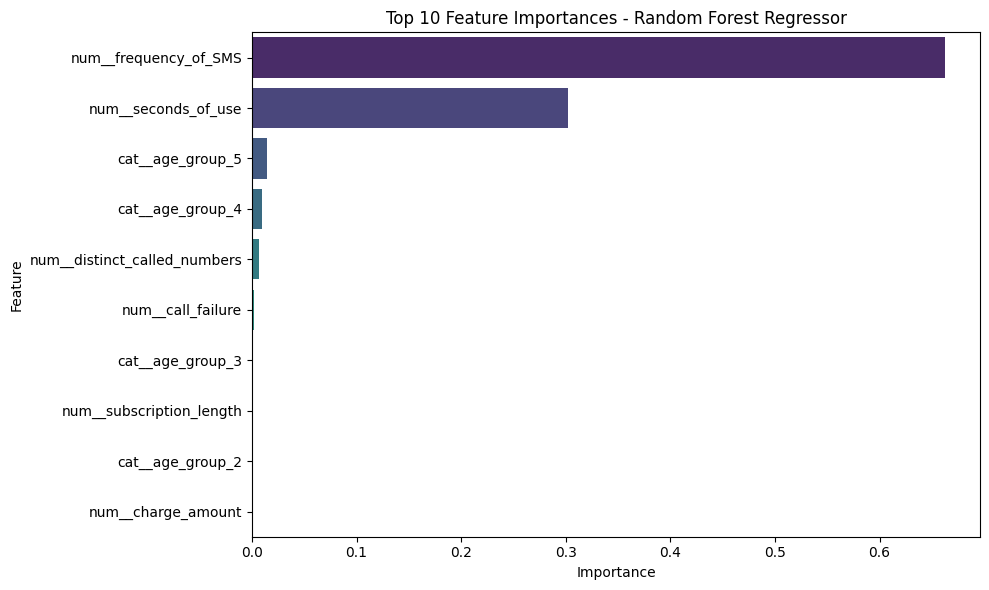

In [24]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=feature_importance_df.head(10), 
    hue="Feature", 
    palette="viridis", 
    legend=False
)
plt.title("Top 10 Feature Importances - Random Forest Regressor") 
plt.tight_layout()
plt.show()

- Most Important Features:
  - Frequency of SMS (66.3% importance)  
  - Seconds of Use (30.2% importance)  
  These two usage-based features contribute to over 96% of the model’s predictive power, making them the core drivers of Customer Lifetime Value in this dataset.

- Moderately Important Features:
  - Age Group 5 (1.4%)  
  - Age Group 4 (1.0%)  
  - Distinct Called Numbers (0.7%)  
  These demographic and behavioral indicators have some relevance, suggesting mature users and diverse calling behavior slightly influence CLV.

- Minimal Impact Features:
  - Call Failures, Complaints, Subscription Length, Charge Amount — all under 0.1%  
  - Tariff Plan and Status — negligible impact  
  These attributes offer limited predictive value for CLV, though they may still play a role in churn modeling.
